<span>
<img src="http://www.sobigdata.eu/sites/default/files/logo-SoBigData-DEFINITIVO.png" width="180px" align="right"/>
</span>
<span>
<b>Author:</b> <a href="http://kdd.isti.cnr.it/people/riccardo-guidotti">Riccardo Guidotti</a><br/>
<b>Python version:</b>  3.x<br/>
</span>

<img align="right" width="300" src="https://upload.wikimedia.org/wikipedia/it/5/53/TitanicFilm.jpg">
# Titanic Case Study
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook, we will try to figure out what sorts of people were likely to survive by using ***clustering*** in python.

The **Titanic** dataset became famous after that ***Kaggle*** launched the competition to discover label the passengers as survived or not by exploiting some available features ([link](https://www.kaggle.com/c/titanic)).

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('titanic.csv') 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [77]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [78]:
df[['Age', 'Survived']].head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [79]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

## Missing Values

In [80]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [81]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Correlation

In [82]:
df['Fare'].corr(df['Age']) 

0.09606669176903888

In [7]:
df.corr() #method : {‘pearson’, ‘kendall’, ‘spearman’}

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
df[df['Survived'] == 0]['Age'].head()

0    22.0
4    35.0
5     NaN
6    54.0
7     2.0
Name: Age, dtype: float64

## Scatter Plot

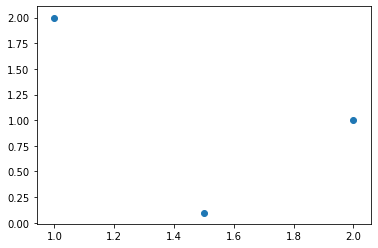

In [13]:
plt.scatter([1.0,2.0,1.5], [2.0,1.0,0.1])

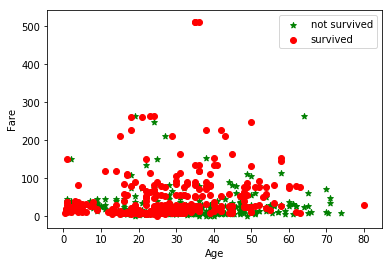

In [85]:
plt.scatter(df[df['Survived'] == 0]['Age'], 
            df[df['Survived'] == 0]['Fare'], color='g', marker='*', label='not survived')
plt.scatter(df[df['Survived'] == 1]['Age'], 
            df[df['Survived'] == 1]['Fare'], color='r',label='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

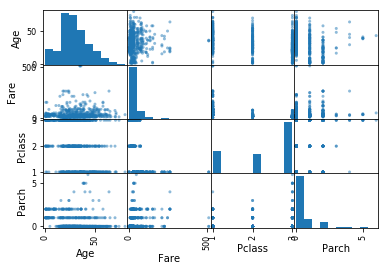

In [86]:
pd.plotting.scatter_matrix(df[['Age', 'Fare', 'Pclass', 'Parch']])
plt.show()

In [87]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [88]:
df[['Age', 'Sex']].head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


In [89]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

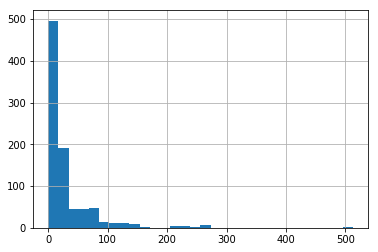

In [90]:
df['Fare'].hist(bins=30)
plt.show()

0    549
1    342
Name: Survived, dtype: int64


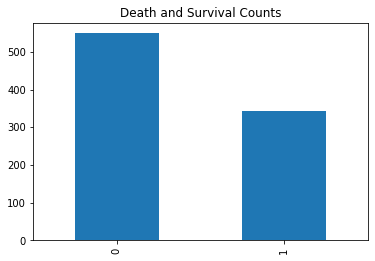

In [14]:
print( df['Survived'].value_counts() )
df['Survived'].value_counts().plot(kind='bar', 
                                   title='Death and Survival Counts')
plt.show()

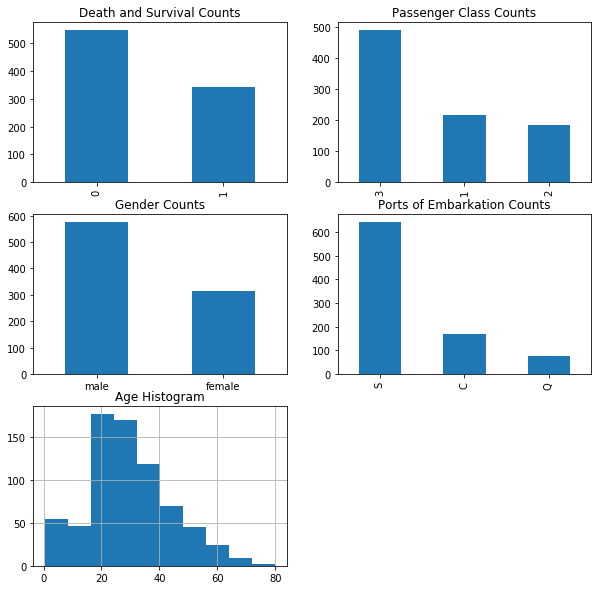

In [92]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

# Plot death and survival counts
plt.subplot2grid(fig_dims, (0, 0))
df['Survived'].value_counts().plot(kind='bar', 
                                   title='Death and Survival Counts')

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class Counts')

# Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df['Sex'].value_counts().plot(kind='bar', title='Gender Counts')
plt.xticks(rotation=0)

# Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df['Embarked'].value_counts().plot(kind='bar', title='Ports of Embarkation Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df['Age'].hist()
plt.title('Age Histogram')

plt.show()

In [16]:
# Pclass
pclass_xt = pd.crosstab(df['Sex'], df['Survived'])
pclass_xt

Survived,0,1
Sex,,
female,81,233
male,468,109


In [20]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


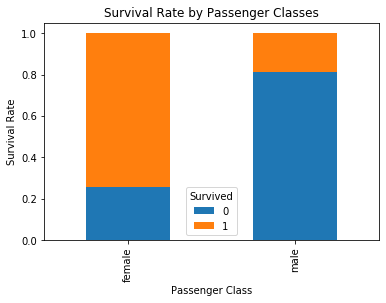

In [21]:
pclass_xt_pct.plot(kind='bar', stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [22]:
# Sex
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [81]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
genders_mapping

{'female': 0, 'male': 1}

In [82]:
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df[['Sex', 'Sex_Val']].head()

,Sex,Sex_Val
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


([<matplotlib.axis.XTick at 0x7fee0c596110>,
 <a list of 2 Text xticklabel objects>)

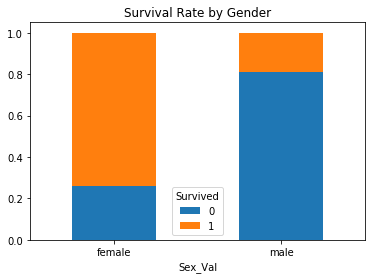

In [83]:
sex_val_xt = pd.crosstab(df['Sex_Val'], df['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, 
                    title='Survival Rate by Gender')
plt.xticks([0, 1], ['female', 'male'], rotation=0)

## Replace Missing Values

In [100]:
# Embarked
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [30]:
df['Embarked'].mode()[0]

'S'

In [54]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [55]:
df['Embarked'].isnull().sum()

0

In [56]:
# Get the unique values of Embarked
embarked_locs = sorted(df['Embarked'].unique())
embarked_locs_mapping = dict(zip(embarked_locs, range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'C': 0, 'Q': 1, 'S': 2}

In [57]:
df['Embarked_Val'] = df['Embarked'].map(embarked_locs_mapping).astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


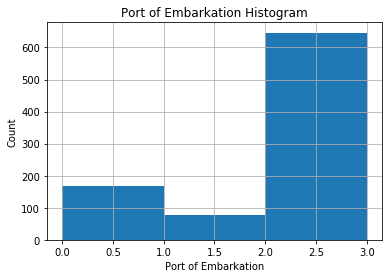

In [58]:
df['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [59]:
# Since the vast majority of passengers embarked in 'S': 3, 
# we assign the missing values in Embarked to 'S':
if len(df[df['Embarked'].isnull()]) > 0:
    df.replace({'Embarked_Val' : { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S']}}, 
               inplace=True)

In [60]:
embarked_locs = sorted(df['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Text(0, 0.5, 'Survival Rate')

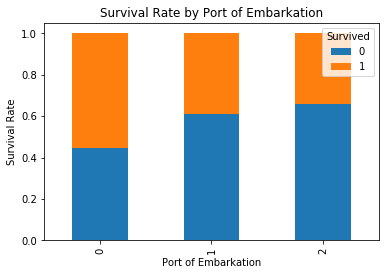

In [61]:
embarked_val_xt = pd.crosstab(df['Embarked_Val'], df['Survived'])
embarked_val_xt_pct = \
    embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

In [62]:
df['Age'].isnull().sum()

177

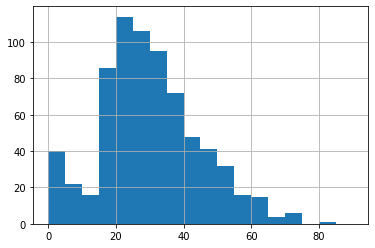

In [63]:
df['Age'].hist(bins=np.arange(0,95,5))
plt.show()

In [112]:
np.mean(df['Age'])

29.69911764705882

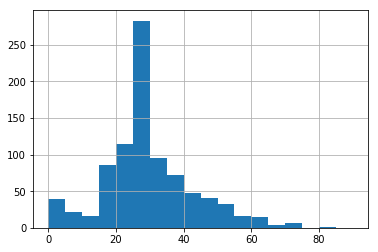

In [113]:
df['Age'].fillna(np.mean(df['Age'])).hist(bins=np.arange(0,95,5))
plt.show()

In [114]:
# Age
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [73]:
def fun_temp(x):
    return x.fillna(x.mean())

In [74]:
df['Age3'] = df['Age'].groupby(
    [df['Sex'], df['Pclass']]).apply(fun_temp)

In [75]:
df['Age'].groupby(
    [df['Sex'], df['Pclass']]).mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

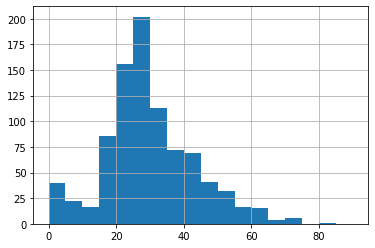

In [76]:
df['Age3'].hist(bins=np.arange(0, 95, 5))
plt.show()

In [79]:
def fun_temp(x):
    return x.fillna(x.median())

28.0


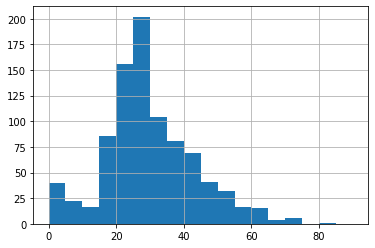

In [84]:
# To keep Age in tact, make a copy of it called AgeFill 
# that we will use to fill in the missing ages:
df['AgeFill'] = df['Age']

print(df['Age'].median())

# Populate AgeFill
df['AgeFill'] = df['AgeFill'].groupby(
    [df['Sex_Val'], df['Pclass']]).apply(lambda x: x.fillna(
    x.median()))
df['AgeFill'].hist(bins=np.arange(0, 95, 5))
plt.show()

Text(0, 0.5, 'Age')

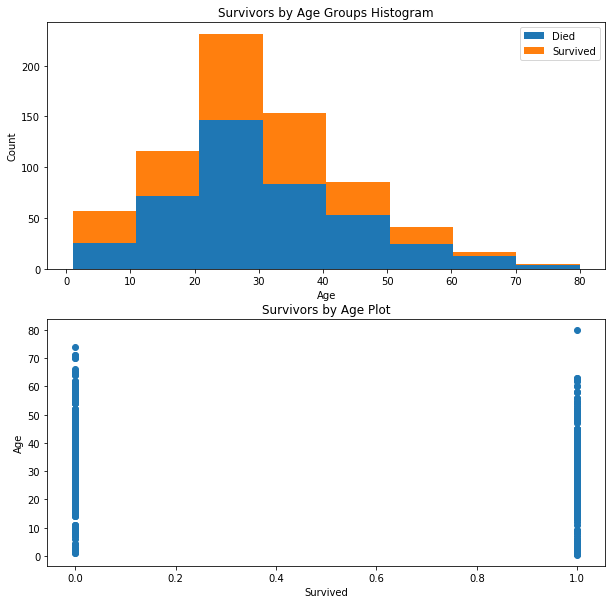

In [85]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=(10,10))

# Histogram of AgeFill segmented by Survived
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']
max_age = max(df['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / 10), # bin_size
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df['Survived'], df['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

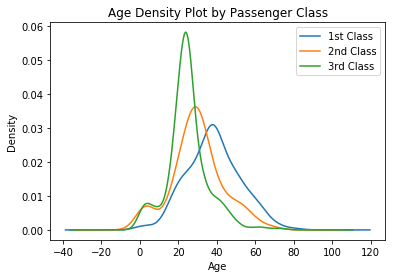

In [122]:
passenger_classes = sorted(df['Pclass'].unique())
for pclass in passenger_classes:
    df.AgeFill[df.Pclass == pclass].plot(kind='kde') #Generate Kernel Density Estimate plot using Gaussian kernels.
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

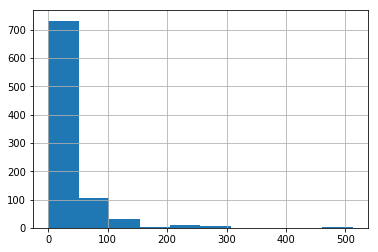

In [123]:
df['Fare'].hist(bins=10)

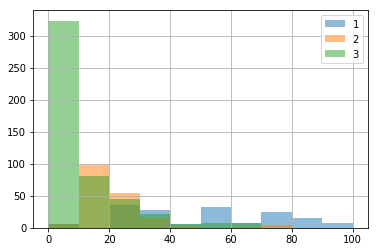

In [129]:
df[df['Pclass'] == 1]['Fare'].hist(bins=np.arange(0, 110, 10), 
                                   label='1', alpha=0.5)
df[df['Pclass'] == 2]['Fare'].hist(bins=np.arange(0, 110, 10),
                                  label='2', alpha=0.5)
df[df['Pclass'] == 3]['Fare'].hist(bins=np.arange(0, 110, 10),
                                  label='3', alpha=0.5)
plt.legend()
plt.show()

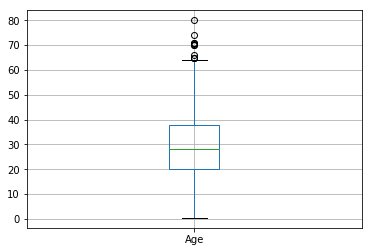

In [147]:
boxplot = df.boxplot(column=['Age'])

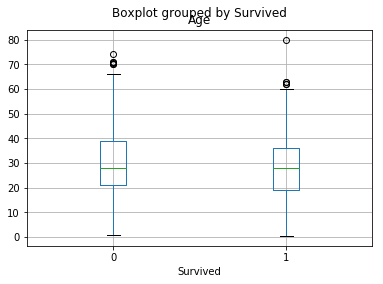

In [149]:
boxplot = df.boxplot(column=['Age'], by='Survived')